In [ ]:
# Mount Google Drive untuk akses dataset.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

# Mengatur path dataset di Google Drive
path = "/content/drive/MyDrive/Colab Notebooks/mangga_image"
train_dir = os.path.join(path, 'train')
valid_dir = os.path.join(path, 'valid')
test_dir = os.path.join(path, 'test')



In [ ]:
# Membangun model CNN
img_input = layers.Input(shape=(150, 150, 3))
x = layers.Conv2D(32, (3, 3), activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(3, activation='softmax')(x)  # Menggunakan softmax untuk multi-class

model = Model(img_input, output)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Kompilasi model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Menyiapkan data generator untuk training dan validasi
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='sparse')  # 'sparse' untuk klasifikasi multi-kelas

valid_generator = val_datagen.flow_from_directory(
        valid_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='sparse')

# Melatih model
history = model.fit(
      train_generator,
      epochs=30,  # Meningkatkan jumlah epoch
      validation_data=valid_generator)

Found 260 images belonging to 3 classes.
Found 324 images belonging to 3 classes.
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 192s 15s/step - accuracy: 0.3853 - loss: 2.1707 - val_accuracy: 0.2963 - val_loss: 1.1191
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.4073 - loss: 1.0332 - val_accuracy: 0.5278 - val_loss: 0.9172
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - accuracy: 0.5209 - loss: 0.8775 - val_accuracy: 0.4630 - val_loss: 1.0619
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 4s/step - accuracy: 0.6203 - loss: 0.8211 - val_accuracy: 0.6944 - val_loss: 0.6833
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.6285 - loss: 0.7583 - val_accuracy: 0.7068 - val_loss: 0.6470
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 32s 3s/step - accuracy: 0.8130 - loss: 0.5779 - val_accuracy: 0.8086 - val_loss: 0.5108
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.8823 - loss: 0.4092 - val_accuracy: 0.7870 - val_loss: 0.4414
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.9121 - loss: 0.2550 - val_accuracy: 0.8889 - val_loss: 0.3063
Epoch 9/30
9/9 ━━

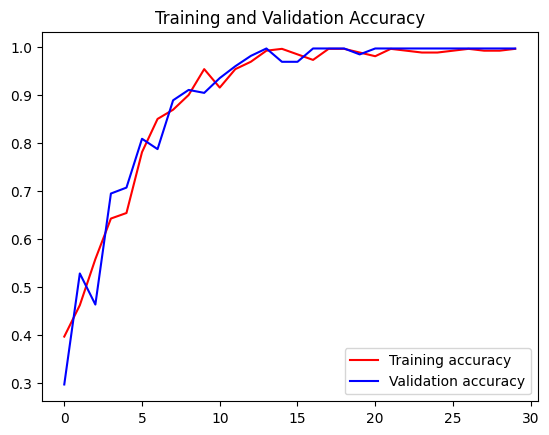

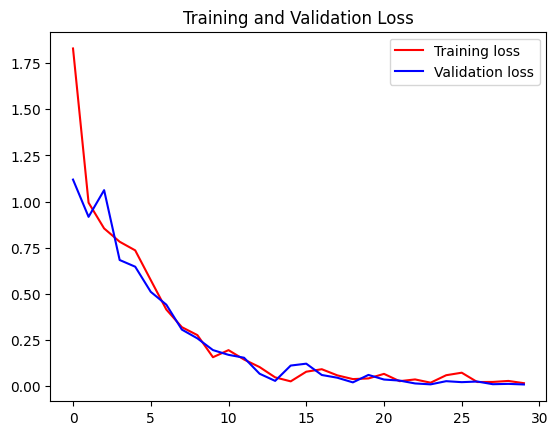

In [ ]:
# Visualisasi akurasi dan loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower right')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:

# Fungsi prediksi gambar tunggal dengan probabilitas
class_labels = ['mangga_busuk', 'mangga_matang', 'kurang matang']

def predict_image_with_percentage(img_path, model):
    # Load gambar dan ubah ukurannya sesuai model
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)  # Konversi ke array
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    img_array /= 255.0  # Normalisasi gambar

    # Prediksi menggunakan model
    predictions = model.predict(img_array)
    probabilities = predictions[0] * 100  # Mengonversi ke persentase

    # Menampilkan hasil prediksi dengan persentase
    print(f"Gambar: {img_path}")
    for i, prob in enumerate(probabilities):
        print(f"Tingkat kematangan {class_labels[i]}: {prob:.2f}%")

In [18]:
# Contoh penggunaan fungsi prediksi gambar tunggal
img_path = '/content/drive/MyDrive/Colab Notebooks/mangga_image/test/mangga_muda/Mangga muda 10.jpg'  # Added .jpg extension to the file name
predict_image_with_percentage(img_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Gambar: /content/drive/MyDrive/Colab Notebooks/mangga_image/test/mangga_muda/Mangga muda 10.jpg
Tingkat kematangan mangga_busuk: 0.00%
Tingkat kematangan mangga_matang: 0.00%
Tingkat kematangan kurang matang: 99.99%
